# Import Required Packages and Libraries

In [1]:
from pathlib import Path 

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import LabelEncoder

from dmba import plotDecisionTree, classificationSummary
from dmba import liftChart

from mord import LogisticIT

%matplotlib inline 
import matplotlib.pylab as plt 

import seaborn as sns

# Preparing data set for analysis.

In [2]:
# Create a data frame 
winequality_df = pd.read_csv('E:\MSBA\Data Mining\DM_Group Project\winequality-red.csv')

In [3]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      winequality_df.shape )

Number of rows and columns in data set: (1599, 12)


In [4]:
# Display the first 5 rows of the dataframe. 
winequality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Display the last five rows of the dataframe.
winequality_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# Display the column names.
print('Original column titles:')
winequality_df.columns

Original column titles:


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Data exploration, cleanup, and preprocessing.

In [7]:
# strip trail spaces and replace the remaining spaces with an underscore '_'. 
print('Modified column titles with no space and one word for titles:')
winequality_df.columns = [s.strip().replace(' ', '_') for s in winequality_df.columns]
winequality_df.columns

Modified column titles with no space and one word for titles:


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#Detect duplicate values
duplicaterow = winequality_df[winequality_df.duplicated()]
duplicaterow

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
#Remove duplicate rows
winequality_df = winequality_df.drop_duplicates()
print('Shape of the dataframe after removing duplicate records is\n', winequality_df.shape)

Shape of the dataframe after removing duplicate records is
 (1359, 12)


In [10]:
#Display count of missing values in columns
print('Number of missing records in winequality_df\n{}'.format(winequality_df.isna().sum()))

Number of missing records in winequality_df
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
# Use describe() function to display column statistics for the entire data set. 
np.round(winequality_df.describe(), decimals=2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [12]:
# Display column data types. 
print('Variable data types before\n{}'.format(winequality_df.dtypes))

Variable data types before
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [13]:
# Converting the outcome variable quality to categorical outcome
def map_quality_rating(quality):
    if quality <= 4:
        return 'low'
    elif quality >= 5 and quality <= 6:
        return 'medium'
    else:
        return 'high'

winequality_df['quality_category'] = pd.Categorical(winequality_df['quality'].apply(map_quality_rating)) 

# Display the classes of the categorical variable
print("Classes:", winequality_df['quality_category'].cat.categories)


Classes: Index(['high', 'low', 'medium'], dtype='object')


In [14]:
# Display column data types after converting quality to categorical. 
print('Variable data types after\n{}'.format(winequality_df.dtypes))

Variable data types after
fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
quality_category        category
dtype: object


In [15]:
# Number of records in each category
counts = winequality_df['quality_category'].value_counts()
print('The number of records in each category\n', counts)

The number of records in each category
 medium    1112
high       184
low         63
Name: quality_category, dtype: int64


In [16]:
# Dropping the quality column our goal is to classify the quality of wine
winequality_df.drop(columns=['quality'], inplace=True)

In [17]:
# Display the first 5 rows of the dataframe. 
winequality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,medium


# Data Partition for classification tree

In [18]:
# Develop predictors X and output variable Y for the data set.
X_ct = winequality_df.drop(columns=['quality_category'])
y_ct = winequality_df['quality_category']

# Print predictor names
print("Predictors (X):")
print(list(X_ct.columns))

# Print outcome variable name
print("Outcome variable (y):")
print(y_ct.name)

Predictors (X):
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Outcome variable (y):
quality_category


In [19]:
# Develop training (60%) and validation(40% or 0.4) partitions 
train_X_ct, valid_X_ct, train_y_ct, valid_y_ct = train_test_split(X_ct, y_ct, test_size=0.4, random_state=1)

# Print the dimensions of the training set
print("Training set dimensions:")
print(train_X_ct.shape, train_y_ct.shape)

# Print the dimensions of the validation set
print("Validation set dimensions:")
print(valid_X_ct.shape, valid_y_ct.shape)

Training set dimensions:
(815, 11) (815,)
Validation set dimensions:
(544, 11) (544,)


# Classification Tree

In [20]:
# Classification tree using optimized parameters
# Start with initial guess for parameters.
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Apply GridSearchCV() function for various combinations of DecisionTreeClassifier() initial parameters.
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X_ct, train_y_ct)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8282
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}


In [21]:
# Improve grid search parameters by adapting grid based on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(),
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X_ct, train_y_ct)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8331
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 10}


Classes: high, low, medium
Best Classification Tree with Grid Search


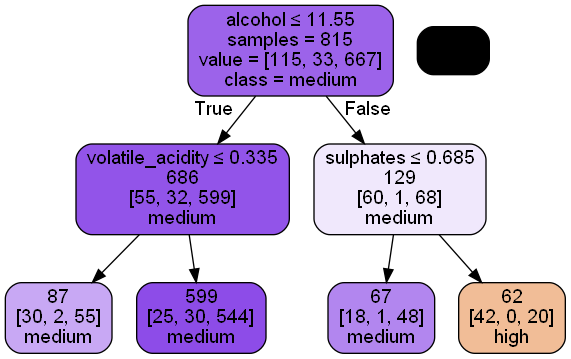

In [22]:
# Create classification tree based on the improved parameters.
ClassTree = gridSearch.best_estimator_

# Display classes used in the classification tree: 'low', 'medium' and 'high'. 
print("Classes: {}".format(', '.join(ClassTree.classes_)))

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(ClassTree, feature_names=train_X_ct.columns,class_names=ClassTree.classes_)

In [23]:
# Identify and display number of nodes in the tree based on grid search.
tree_nodes_grid = ClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 7


In [24]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Classification Summary for Training Partition using Classification Tree')
classificationSummary(train_y_ct, ClassTree.predict(train_X_ct))

# Identify and display confusion matrix for validation partition. 
print()
print('Classification Summary for Validation Partition using Classification Tree')
classificationSummary(valid_y_ct, ClassTree.predict(valid_X_ct))

Classification Summary for Training Partition using Classification Tree
Confusion Matrix (Accuracy 0.8454)

       Prediction
Actual   0   1   2
     0  42   0  73
     1   0   0  33
     2  20   0 647

Classification Summary for Validation Partition using Classification Tree
Confusion Matrix (Accuracy 0.8382)

       Prediction
Actual   0   1   2
     0  26   0  43
     1   0   0  30
     2  15   0 430


# Preprocessing for Neural Network and Logistic Regression

In [25]:
# Create a dictionary to map categories to integer values
label_dict = {'low': 0, 'medium': 1, 'high': 2}

# Create a LabelEncoder object and fit_transform the column data
le = LabelEncoder()
winequality_df['quality_category_int'] = le.fit_transform(winequality_df['quality_category'].map(label_dict))

winequality_df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_category,quality_category_int
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,medium,1


In [26]:
# Dropping the quality_category column
winequality_df.drop(columns=['quality_category'], inplace=True)
winequality_df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_category_int
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


# Data Partition for Neural network and logistic Regression

In [27]:
# Data Partition as now the outcome variable is quality_category_int
# Develop predictors X and output variable Y for the data set.
X = winequality_df.drop(columns=['quality_category_int'])
y = winequality_df['quality_category_int']

#Print predictor names
print("Predictors (X):")
print(list(X.columns))

#Print outcome variable name
print("Outcome variable (y):")
print(y.name)

Predictors (X):
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Outcome variable (y):
quality_category_int


In [28]:
# Develop training (60%) and validation(40% or 0.4) partitions 
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#Print the dimensions of the training set
print("Training set dimensions:")
print(train_X.shape, train_y.shape)

# Print the dimensions of the validation set
print("Validation set dimensions:")
print(valid_X.shape, valid_y.shape)

Training set dimensions:
(815, 11) (815,)
Validation set dimensions:
(544, 11) (544,)


# Neural Network

In [29]:
# Identify grid search parameters 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8429
Best parameter:  {'hidden_layer_sizes': 9}


In [30]:
# For each hidden_layer_size, display grid search results including
# mean and standard deviation of the score. 
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         2         0.818405        0.003006
1                         3         0.818405        0.003006
2                         4         0.840491        0.009504
3                         5         0.833129        0.014203
4                         6         0.834356        0.013990
5                         7         0.826994        0.017949
6                         8         0.834356        0.024845
7                         9         0.842945        0.013773
8                        10         0.828221        0.013990
9                        11         0.834356        0.013990
10                       12         0.831902        0.013215
11                       13         0.830675        0.018446
12                       14         0.842945        0.015809
13                       15         0.838037        0.018849
14                       16         0.830675        0.017611
15                      

<AxesSubplot: xlabel='param_hidden_layer_sizes'>

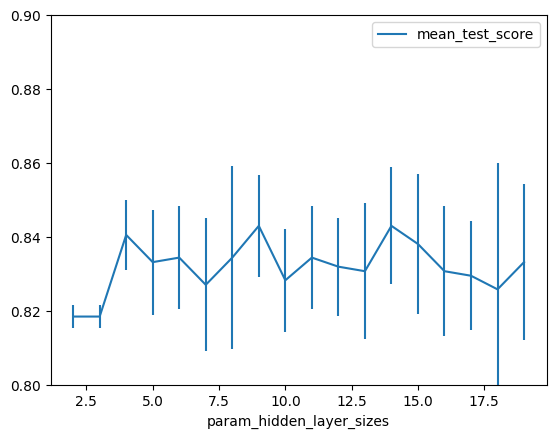

In [31]:
# Develop a plot that demostrates mean_test_score and std_test_score.
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                    y='mean_test_score', yerr='std_test_score', ylim=(0.8, 0.9))

In [39]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 
 
quality_clf = MLPClassifier(hidden_layer_sizes=(9), max_iter=10000,
                activation='logistic', solver='adam', random_state=1)
quality_clf.fit(train_X, train_y)

# Display network structure with the final values of intercepts (Theta) and weights (W).
print('Final Intercepts for Red Wine Quality Neural Network Model')
print(quality_clf.intercepts_)

print()
print('Network Weights for Red Wine Quality Neural Network Model')
print(quality_clf.coefs_)

Final Intercepts for Red Wine Quality Neural Network Model
[array([ 0.5327541 , -0.14027825, -0.11558842,  0.73895585,  0.26865582,
        0.47276833,  0.23108742, -0.7727363 ,  0.18495584]), array([-0.39796643,  0.25587508, -0.01169794])]

Network Weights for Red Wine Quality Neural Network Model
[array([[ 1.66890563e-01,  2.09882697e-01, -1.98140913e-01,
        -4.09207249e-02, -2.84004893e-01, -7.33181679e-02,
        -2.96657674e-01, -1.42753079e-01, -1.54119718e-01],
       [ 9.84396192e-01, -3.17075073e-01, -7.82513183e-01,
         1.98311215e+00,  1.24989532e+00, -8.65373501e-02,
         1.55527765e+00, -1.98713985e+00, -4.56245141e-02],
       [-8.60731028e-01, -8.99770587e-02,  1.32801925e+00,
        -1.31187200e+00, -1.20583962e+00,  2.11195171e-04,
        -9.05760945e-01,  1.51525524e+00, -3.61689286e-01],
       [-3.54995927e-01, -1.91159683e-01, -7.32604268e-02,
         7.54835190e-02, -3.98196465e-01,  7.31171219e-02,
        -2.07428149e-01, -8.11510532e-02, -1.81

In [40]:
# Make wine quality classification for validation set using red wine quality neural network model. 

# Use quality_clf model to classify wine quality for validation set.
winequality_pred = quality_clf.predict(valid_X)

# Predict wine quality probabilities p(0), p(1), and p(2) for validation set.
winequality_pred_prob = np.round(quality_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
winequality_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in winequality_pred_prob],
                'p(1)': [p[1] for p in winequality_pred_prob],
                'p(2)': [p[2] for p in winequality_pred_prob],
                'Classification': winequality_pred})

print('Classification for Red Wine Quality Data for Validation Partition')
print(winequality_pred_result.head(10))

Classification for Red Wine Quality Data for Validation Partition
      Actual    p(0)    p(1)    p(2)  Classification
473        1  0.0357  0.5896  0.3747               1
1376       1  0.0320  0.9553  0.0127               1
533        1  0.0188  0.5534  0.4279               1
200        2  0.0203  0.7116  0.2681               1
268        1  0.0342  0.9294  0.0364               1
210        1  0.0228  0.5467  0.4305               1
906        1  0.0339  0.9338  0.0322               1
1093       2  0.0170  0.6427  0.3403               1
947        2  0.0347  0.4487  0.5166               2
867        1  0.0407  0.7144  0.2449               1


In [41]:
# Confusion matrices for Red Wine Quality neural network model. 

# Identify and display confusion matrix for training partition. 
print('Classification Summary for Training Partition using Neural Network Model')
classificationSummary(train_y, quality_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Classification Summary for Validation Partition using Neural Network Model')
classificationSummary(valid_y, quality_clf.predict(valid_X))

Classification Summary for Training Partition using Neural Network Model
Confusion Matrix (Accuracy 0.8307)

       Prediction
Actual   0   1   2
     0   0  33   0
     1   0 661   6
     2   0  99  16

Classification Summary for Validation Partition using Neural Network Model
Confusion Matrix (Accuracy 0.8327)

       Prediction
Actual   0   1   2
     0   0  30   0
     1   0 440   5
     2   0  56  13


# Logistic Regression

In [35]:
# Develop and display ordinal logistic model. 

# Utilize LogisticIT() function from mord library to develop ordinal logistic regression.  
logit_ord = LogisticIT(alpha=0)
logit_ord.fit(train_X, train_y)

# Display intercept (logit_ord.theta) and coefficients of the ordinal logistic regression (logit_ord.coef_). 
print('Ordinal Logistic Regression')
print('  Intercepts', np.round(logit_ord.theta_, decimals=3))
print('  Coefficients', np.round(logit_ord.coef_, decimals=3))
print()

# Classify ordinal logistic outcomes results_ord and 
# probabilities prob_ord for validation partition, 
# i.e., p(0), p(1), and p(2) for wine quality data set.
results_ord = logit_ord.predict(valid_X)
prob_ord = np.round(logit_ord.predict_proba(valid_X), decimals=4)

# Create data frame to show ordinal logistic model resuts for wine quality data set.
print()
print('Classification for First 10 Records in Validation Data Set')
results_ord = pd.DataFrame({
    'Actual': valid_y, 'Classification': results_ord,
    'P(0)': [p[0] for p in prob_ord],
    'P(1)': [p[1] for p in prob_ord],
    'P(2)': [p[2] for p in prob_ord],
})

# Display 10 top records with actual classes and classification 
# results, and respective probabilities. 
print(results_ord.head(10))

Ordinal Logistic Regression
  Intercepts [0.633 7.597]
  Coefficients [ 1.130e-01 -4.138e+00 -3.520e-01  3.000e-03 -4.382e+00  1.100e-02
 -4.000e-03 -5.930e-01 -1.585e+00  4.261e+00  9.230e-01]


Classification for First 10 Records in Validation Data Set
      Actual  Classification    P(0)    P(1)    P(2)
473        1               1  0.0025  0.7263  0.2712
1376       1               1  0.1394  0.8548  0.0058
533        1               2  0.0003  0.2624  0.7373
200        2               1  0.0024  0.7139  0.2837
268        1               1  0.0251  0.9395  0.0354
210        1               2  0.0008  0.4482  0.5510
906        1               1  0.0106  0.9082  0.0812
1093       2               2  0.0005  0.3604  0.6390
947        2               1  0.0010  0.5073  0.4917
867        1               1  0.0035  0.7852  0.2113


In [36]:
# Identify and display confusion matrix for training partition. 
print('Accuracy Measure for Training Partition for Ordinal Logistic Model')
classificationSummary(train_y, logit_ord.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Accuracy Measure for Validation Partition for Ordinal Logistic Model')
classificationSummary(valid_y, logit_ord.predict(valid_X))

Accuracy Measure for Training Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.8442)

       Prediction
Actual   0   1   2
     0   1  32   0
     1   1 645  21
     2   0  73  42

Accuracy Measure for Validation Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.8180)

       Prediction
Actual   0   1   2
     0   1  28   1
     1   0 423  22
     2   0  48  21


In [42]:
# Identify and display confusion matrix for validation partition. 
print()
print('Classification Summary for Validation Partition using Classification Tree')
classificationSummary(valid_y_ct, ClassTree.predict(valid_X_ct))

# Identify and display confusion matrix for validation partition. 
print()
print('Classification Summary for Validation Partition using Neural Network Model')
classificationSummary(valid_y, quality_clf.predict(valid_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Accuracy Measure for Validation Partition for Ordinal Logistic Model')
classificationSummary(valid_y, logit_ord.predict(valid_X))


Classification Summary for Validation Partition using Classification Tree
Confusion Matrix (Accuracy 0.8382)

       Prediction
Actual   0   1   2
     0  26   0  43
     1   0   0  30
     2  15   0 430

Classification Summary for Validation Partition using Neural Network Model
Confusion Matrix (Accuracy 0.8327)

       Prediction
Actual   0   1   2
     0   0  30   0
     1   0 440   5
     2   0  56  13

Accuracy Measure for Validation Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.8180)

       Prediction
Actual   0   1   2
     0   1  28   1
     1   0 423  22
     2   0  48  21


In [43]:
# Develop dataframe with 3 new records. Notice that the 
# preditors used in smaller classification tree. 

'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'
new_data_small = pd.DataFrame({
            'fixed_acidity': [7.2,6.2,6.7],  
            'volatile_acidity': [0.55,0.66,0.45],
            'citric_acid': [0.25,0.32,0.45],
            'residual_sugar': [1.8,1.2,2.6],  
            'chlorides': [0.083, 0.076, 0.072],
            'free_sulfur_dioxide': [28,27,26],
            'total_sulfur_dioxide': [93,92,80],
            'density': [0.9966,0.8977,0.9060],  
            'pH': [3.29,3.15,2.99],  
            'sulphates': [0.56,0.46,0.7],  
            'alcohol': [10.8,10.7,11.6],
})

# Make classifications for new data. 
pred_small_tree = ClassTree.predict(new_data_small)

# Make classifications for new Universal Bank data.
pred_small_result = pd.DataFrame({
            'fixed_acidity': [7.2,6.2,6.7],  
            'volatile_acidity': [0.55,0.66,0.45],
            'citric_acid': [0.25,0.32,0.45],
            'residual_sugar': [1.8,1.2,2.6],  
            'chlorides': [0.083, 0.076, 0.072],
            'free_sulfur_dioxide': [28,27,26],
            'total_sulfur_dioxide': [93,92,80],
            'density': [0.9966,0.8977,0.9060],  
            'pH': [3.29,3.15,2.99],  
            'sulphates': [0.56,0.46,0.7],  
            'alcohol': [10.8,10.7,11.6],
            'classification': pred_small_tree,
})

print()
print('Classifications for Red Wine Quality')
pred_small_result


Classifications for Red Wine Quality


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,classification
0,7.2,0.55,0.25,1.8,0.083,28,93,0.9966,3.29,0.56,10.8,medium
1,6.2,0.66,0.32,1.2,0.076,27,92,0.8977,3.15,0.46,10.7,medium
2,6.7,0.45,0.45,2.6,0.072,26,80,0.9060,2.99,0.70,11.6,high
